# Polynomial Linear Regression

## y = b0 + b1x1 + b2x2^2 + ...

### Why Linear:

#### Linear refers to coefficients.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Position_Salaries.csv')

In [3]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
X = data.iloc[: , 1:2].values
y = data.iloc[:, -1].values

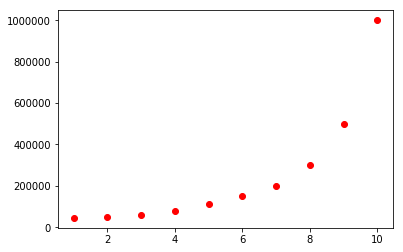

In [5]:
plt.figure()
plt.scatter(x=data.Level, y=data.Salary, color='r')

In [6]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0, random_state=42)
#We won't use train-test split in this example as our sample size is relatively small (n=10)

c:\users\berk_\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
# Fitting Linear Regression to the dataset

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
# Fitting Polynomial Regression to the dataset

from sklearn.preprocessing import PolynomialFeatures
pol_reg = PolynomialFeatures(degree = 9)
X_poly = pol_reg.fit_transform(X_train)

#Now we need to create a new Linear regressor object to fit our polynomial 
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
X_poly

array([[   1.,    9.,   81.,  729.],
       [   1.,    2.,    4.,    8.],
       [   1.,    6.,   36.,  216.],
       [   1.,    1.,    1.,    1.],
       [   1.,    8.,   64.,  512.],
       [   1.,    3.,    9.,   27.],
       [   1.,   10.,  100., 1000.],
       [   1.,    5.,   25.,  125.],
       [   1.,    4.,   16.,   64.],
       [   1.,    7.,   49.,  343.]])

In [ ]:
'''Parameters
----------
degree : integer
    The degree of the polynomial features. Default = 2.

interaction_only : boolean, default = False
    If true, only interaction features are produced: features that are
    products of at most ``degree`` *distinct* input features (so not
    ``x[1] ** 2``, ``x[0] * x[2] ** 3``, etc.).

include_bias : boolean
    If True (default), then include a bias column, the feature in which
    all polynomial powers are zero (i.e. a column of ones - acts as an
    intercept term in a linear model).

Examples
--------
>>> X = np.arange(6).reshape(3, 2)
>>> X
array([[0, 1],
       [2, 3],
       [4, 5]])
>>> poly = PolynomialFeatures(2)
>>> poly.fit_transform(X)
array([[  1.,   0.,   1.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.],
       [  1.,   4.,   5.,  16.,  20.,  25.]])
>>> poly = PolynomialFeatures(interaction_only=True)
>>> poly.fit_transform(X)
array([[  1.,   0.,   1.,   0.],
       [  1.,   2.,   3.,   6.],
       [  1.,   4.,   5.,  20.]])'''

In [16]:

np.concatenate((X_poly,np.vstack(y_train)),axis=1).astype('int')

array([[      1,       9,      81,     729,    6561,   59049,  500000],
       [      1,       2,       4,       8,      16,      32,   50000],
       [      1,       6,      36,     216,    1296,    7776,  150000],
       [      1,       1,       1,       1,       1,       1,   45000],
       [      1,       8,      64,     512,    4096,   32768,  300000],
       [      1,       3,       9,      27,      81,     243,   60000],
       [      1,      10,     100,    1000,   10000,  100000, 1000000],
       [      1,       5,      25,     125,     625,    3125,  110000],
       [      1,       4,      16,      64,     256,    1024,   80000],
       [      1,       7,      49,     343,    2401,   16807,  200000]])

c:\users\berk_\appdata\local\programs\python\python36\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


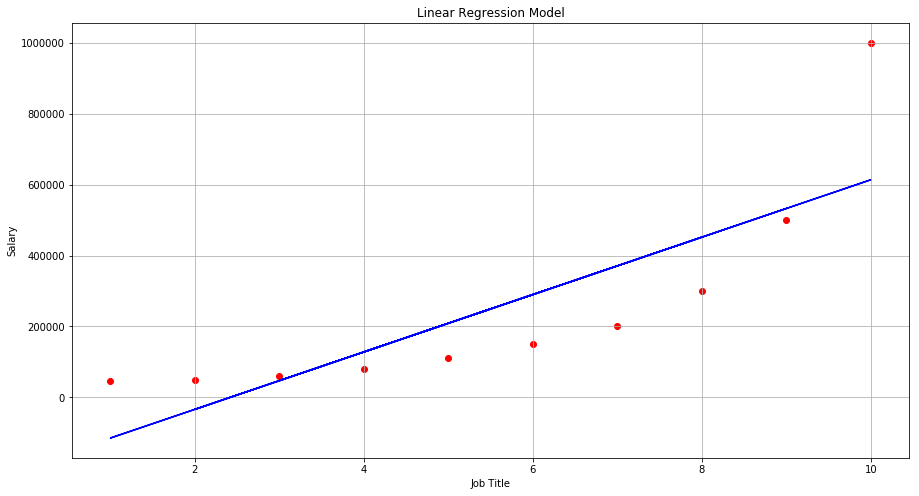

In [13]:
#Visualizing the Linear Regression Results
plt.figure(figsize = [15,8])
plt.scatter(X , y , color ='red')
plt.plot(X_train, lin_reg.predict(X_train), color='blue')
plt.title('Linear Regression Model')
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.grid('on')

c:\users\berk_\appdata\local\programs\python\python36\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


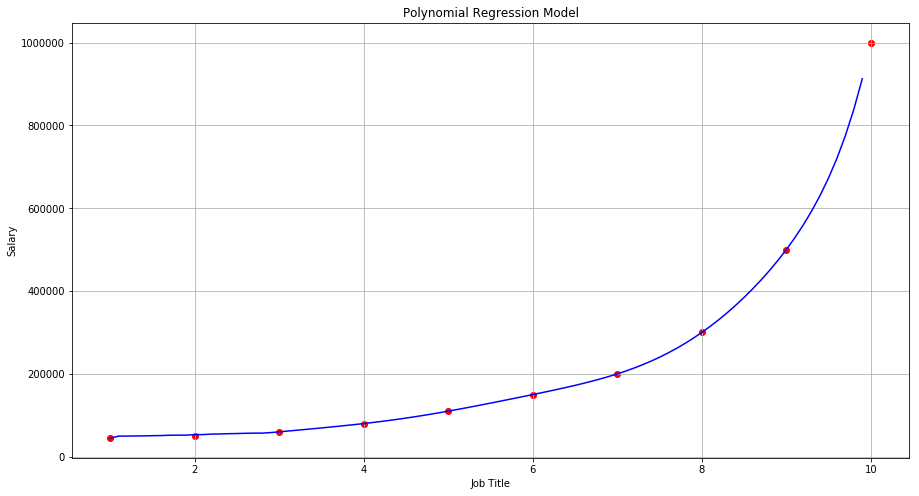

In [21]:
#Visualizing the Polynomial Regression Results

#Creating a smoother line
X_grid = np.arange(min(X),max(X),.1)
X_grid = X_grid.reshape((len(X_grid),1))


plt.figure(figsize = [15,8])
plt.scatter(X , y , color ='red')
plt.plot(sorted(X_grid), sorted(lin_reg2.predict(pol_reg.fit_transform(X_grid)),reverse=False), color='blue')
plt.title('Polynomial Regression Model')
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.grid('on')

In [18]:
# Predicting a new result with Linear Regression
lin_reg.predict(6.5)

array([330378.78787879])

In [19]:
# Predicting a new result with Polynomia Regression
lin_reg2.predict(pol_reg.fit_transform(6.5))

array([174878.07765155])

In [36]:
a=(y-lin_reg2.predict(X_poly))**2
a


array([2.07025156e+11, 8.61828488e-04, 8.10000695e+09, 1.22499653e+09,
       3.60999922e+10, 8.10000435e+09, 6.39999772e+11, 3.60999977e+10,
       1.76400054e+11, 6.39999977e+11])

AttributeError: 'list' object has no attribute 'sum'

In [39]:
np.sin(X).ravel()

array([ 0.84147098,  0.90929743,  0.14112001, -0.7568025 , -0.95892427,
       -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849, -0.54402111])